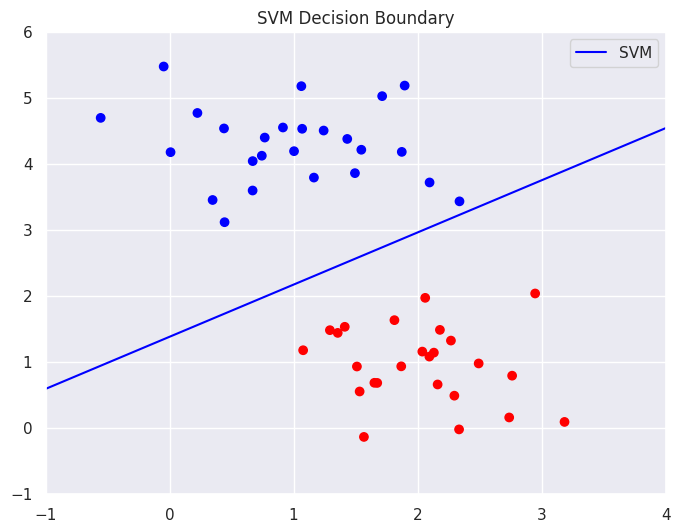

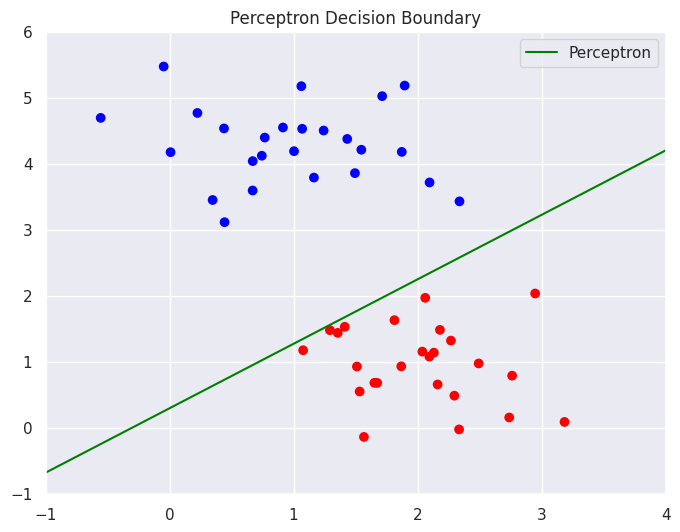

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate data
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
y[y == 0] = -1  # Convert labels to -1 and 1

def svm_loss(w, X, y, C):
    hinge_loss = np.maximum(0, 1 - y * np.dot(X, w))
    return np.sum(hinge_loss) + 1 * C * np.dot(w, w)

def perceptron_loss(w, X, y):
    return -np.sum(y * np.dot(X, w))

def subgradient_descent(w_init, X, y, loss_fn, lr=0.01, num_epochs=1000, C=1):
    w = w_init
    losses = []

    for epoch in range(num_epochs):
        if loss_fn == svm_loss:
            loss = loss_fn(w, X, y, C)
        else:
            loss = loss_fn(w, X, y)
        losses.append(loss)

        grad = subgradient(w, X, y, loss_fn, C)
        w = w - lr * grad

    return w, losses

def subgradient(w, X, y, loss_fn, C):
    if loss_fn == svm_loss:
        hinge_loss = 1 - y * np.dot(X, w)
        subgrad = np.zeros(len(w))
        for i, hl in enumerate(hinge_loss):
            if hl > 0:
                subgrad += -y[i] * X[i]
        subgrad += C * w
    else:
        y_pred = np.sign(np.dot(X, w))
        misclassified = (y_pred != y)
        subgrad = -np.sum(X[misclassified] * y[misclassified, np.newaxis], axis=0)

    return subgrad

w_init = np.zeros(X.shape[1] + 1)
X = np.c_[np.ones(X.shape[0]), X]

w_svm, losses_svm = subgradient_descent(w_init, X, y, svm_loss, lr=0.01, num_epochs=1000, C=1)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr')
plt.xlim(-1, 4)
plt.ylim(-1, 6)

x_svm = np.linspace(-1, 4, 100)
if np.abs(w_svm[2]) < 1e-10:
    print("Warning: w_svm[2] is too close to zero. Decision boundary may be invalid.")
else:
    y_svm = (-w_svm[0] - w_svm[1] * x_svm) / w_svm[2]
    plt.plot(x_svm, y_svm, label='SVM', color='blue')
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()

w_percep, losses_percep = subgradient_descent(w_init, X, y, perceptron_loss, lr=0.01, num_epochs=1000)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr')
plt.xlim(-1, 4)
plt.ylim(-1, 6)

x_percep = np.linspace(-1, 4, 100)
y_percep = (-w_percep[0] - w_percep[1] * x_percep) / w_percep[2]
plt.plot(x_percep, y_percep, label='Perceptron', color='green')
plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()